# 1 - EDA

In [1]:
%reload_ext watermark

In [2]:
import numpy as np
import statsmodels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
%watermark --iversions

numpy      : 2.2.6
pandas     : 2.2.3
seaborn    : 0.13.2
statsmodels: 0.14.4
matplotlib : 3.10.3



In [3]:
offers = pd.read_csv("ofertas_relampago.csv")
offers

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [4]:
# lower case renaming
offers.columns = [c.lower() for c in offers.columns]

In [5]:
offers.columns

Index(['offer_start_date', 'offer_start_dttm', 'offer_finish_dttm',
       'offer_type', 'involved_stock', 'remaining_stock_after_end',
       'sold_amount', 'sold_quantity', 'origin', 'shipping_payment_type',
       'dom_domain_agg1', 'vertical', 'domain_id'],
      dtype='object')

# EAD

In [6]:
# Describe function with different values to analyse
def explore_describe(df):
    df_out = pd.DataFrame(columns = ['variable','type','na' ,'na_pct' ,'unique','min', 'quat25','median','mean', \
                                     'quat75','max','std','skewness','kurtosis','media_desvio'])
    df_out['variable'] = df.columns
    df_out['type'] = df.dtypes.values
    df_out['na'] = [sum(df[coluna].isna()) for coluna in df.columns]
    df_out['na_pct'] = [str(round(100*sum(df[coluna].isna())/df.shape[0],1))+'%' for coluna in df.columns]
    df_out['unique'] = [len(df[coluna].unique()) for coluna in df.columns]
    df_out['min']  = [round(min(df[coluna]),2) if 'int' in str(df[coluna].dtype) or 'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['mean'] = [round(df[coluna].mean(),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['max']  = [round(max(df[coluna]),2) if 'int' in str(df[coluna].dtype) or 'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['std'] = [round(df[coluna].std(),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['quat25'] = [round(df[coluna].quantile(0.25),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['quat75'] = [round(df[coluna].quantile(0.75),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['median'] = [round(df[coluna].quantile(0.5),2) if 'int' in str(df[coluna].dtype) or \
                      'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['skewness'] = [round(df[coluna].skew(),2) if 'int' in str(df[coluna].dtype) or \
                          'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    df_out['kurtosis'] = [round(df[coluna].kurt(),2) if 'int' in str(df[coluna].dtype) or \
                          'float' in str(df[coluna].dtype) else '-' for coluna in df.columns]
    
    df_out_media_desvio_list = []
    for coluna in df.columns:
        if(('int' in str(df[coluna].dtype)) or ('float' in str(df[coluna].dtype)) ):
            if((all(df[coluna] == 0)) or (df[coluna].std() == 0)):
                df_out_media_desvio_list.append(0)
            else:
                df_out_media_desvio_list.append(round(df[coluna].mean()/df[coluna].std(),2))
        else:
            df_out_media_desvio_list.append('-')
    
    df_out['media_desvio'] = df_out_media_desvio_list
    return(df_out)

In [7]:
# There is only one value in offer_type
explore_describe(offers)

,variable,type,na,na_pct,unique,min,quat25,median,mean,quat75,max,std,skewness,kurtosis,media_desvio
0,offer_start_date,object,0,0.0%,61,-,-,-,-,-,-,-,-,-,-
1,offer_start_dttm,object,0,0.0%,783,-,-,-,-,-,-,-,-,-,-
2,offer_finish_dttm,object,0,0.0%,7578,-,-,-,-,-,-,-,-,-,-
3,offer_type,object,0,0.0%,1,-,-,-,-,-,-,-,-,-,-
4,involved_stock,int64,0,0.0%,505,1,5.0,10.0,35.01,15.0,9000,206.76,19.64,508.23,0.17
5,remaining_stock_after_end,int64,0,0.0%,801,-192,4.0,8.0,30.57,15.0,8635,195.81,19.99,518.32,0.16
6,sold_amount,float64,24167,49.6%,7604,0.28,5.73,12.42,51.21,30.92,4836.57,175.25,10.71,172.6,0.29
7,sold_quantity,float64,24167,49.6%,374,1.0,1.0,3.0,10.85,6.0,1646.0,45.48,13.04,267.39,0.24
8,origin,object,37430,76.8%,2,-,-,-,-,-,-,-,-,-,-
9,shipping_payment_type,object,0,0.0%,2,-,-,-,-,-,-,-,-,-,-


In [8]:
offers.offer_type.unique()

array(['lightning_deal'], dtype=object)

In [9]:
# Converting date columns into datetime
datetime_columns = ["offer_start_date", "offer_start_dttm", "offer_finish_dttm"]
offers = offers.assign(**{c: pd.to_datetime(offers[c]) for c in datetime_columns})

In [10]:
# There are only two different types of origin and shipping payment type
# 77% of the origin records are null
offers.origin.value_counts(dropna=False, normalize=True)

origin
NaN    0.767858
A      0.232142
Name: proportion, dtype: float64

In [11]:
# Free shipping are 54%
offers.shipping_payment_type.value_counts(dropna=False, normalize=True)

shipping_payment_type
free_shipping    0.546876
none             0.453124
Name: proportion, dtype: float64

## Feature engineering

In [12]:
# Let's create a lighting deal column (hours)
offers = offers\
    .assign(duration=lambda x:
            (x.offer_finish_dttm - x.offer_start_dttm)/np.timedelta64(1, "h"))

In [13]:
explore_describe(offers)

,variable,type,na,na_pct,unique,min,quat25,median,mean,quat75,max,std,skewness,kurtosis,media_desvio
0,offer_start_date,datetime64[ns],0,0.0%,61,-,-,-,-,-,-,-,-,-,-
1,offer_start_dttm,"datetime64[ns, UTC]",0,0.0%,783,-,-,-,-,-,-,-,-,-,-
2,offer_finish_dttm,"datetime64[ns, UTC]",0,0.0%,7578,-,-,-,-,-,-,-,-,-,-
3,offer_type,object,0,0.0%,1,-,-,-,-,-,-,-,-,-,-
4,involved_stock,int64,0,0.0%,505,1,5.0,10.0,35.01,15.0,9000,206.76,19.64,508.23,0.17
5,remaining_stock_after_end,int64,0,0.0%,801,-192,4.0,8.0,30.57,15.0,8635,195.81,19.99,518.32,0.16
6,sold_amount,float64,24167,49.6%,7604,0.28,5.73,12.42,51.21,30.92,4836.57,175.25,10.71,172.6,0.29
7,sold_quantity,float64,24167,49.6%,374,1.0,1.0,3.0,10.85,6.0,1646.0,45.48,13.04,267.39,0.24
8,origin,object,37430,76.8%,2,-,-,-,-,-,-,-,-,-,-
9,shipping_payment_type,object,0,0.0%,2,-,-,-,-,-,-,-,-,-,-


## Time series analysis

In [14]:
# Adding new columns
daysofweek = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday",
              "Friday", "Saturday"]
offers = offers.assign(day_of_week_start=lambda x:
                       pd.Categorical(x.offer_start_dttm.dt.day_name(),
                                      categories=daysofweek,
                                      ordered=True),
                       day_of_week_finish=lambda x:
                       pd.Categorical(x.offer_finish_dttm.dt.day_name(),
                                      categories=daysofweek,
                                      ordered=True),
                       offer_finish_date=lambda x:
                       x.offer_finish_dttm.dt.date
                      )

In [15]:
offers.offer_start_dttm.describe()

count                                  48746
mean     2021-07-06 00:35:32.408813056+00:00
min                2021-06-01 07:00:00+00:00
25%                2021-06-22 15:00:00+00:00
50%                2021-07-07 18:00:00+00:00
75%                2021-07-21 12:00:00+00:00
max                2021-07-31 19:00:00+00:00
Name: offer_start_dttm, dtype: object

In [16]:
offers.offer_finish_dttm.describe()

count                                  48746
mean     2021-07-06 06:18:02.448713984+00:00
min                2021-06-01 07:00:00+00:00
25%                2021-06-22 21:22:13+00:00
50%                2021-07-08 00:00:00+00:00
75%      2021-07-21 15:03:39.750000128+00:00
max                2021-08-01 03:00:00+00:00
Name: offer_finish_dttm, dtype: object

In [17]:
# Is sold quantity = involved_stock - remaining_stock_after_end
# Yes, for 93% of the records
# Maybe this difference is caused by a difference of time to update the values
# or just an error
(offers["involved_stock"] - offers["remaining_stock_after_end"] == 
 offers["sold_quantity"].fillna(0)).value_counts(normalize=True)

True     0.926497
False    0.073503
Name: proportion, dtype: float64

In [18]:
offers[(offers["involved_stock"] - offers["remaining_stock_after_end"] != 
        offers["sold_quantity"].fillna(0))]

,offer_start_date,offer_start_dttm,offer_finish_dttm,offer_type,involved_stock,remaining_stock_after_end,sold_amount,sold_quantity,origin,shipping_payment_type,dom_domain_agg1,vertical,domain_id,duration,day_of_week_start,day_of_week_finish,offer_finish_date
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,4.092222,Tuesday,Tuesday,2021-06-22
33,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,11,26.82,5.0,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-BLOUSES,6.000000,Tuesday,Tuesday,2021-06-22
37,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 21:00:00+00:00,lightning_deal,10,8,13.34,3.0,A,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-MUGS,8.000000,Tuesday,Tuesday,2021-06-22
93,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:00:09+00:00,lightning_deal,10,9,13.58,2.0,NaN,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,6.002500,Tuesday,Wednesday,2021-06-23
99,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 19:28:55+00:00,lightning_deal,7,-3,15.57,6.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,3.481944,Tuesday,Tuesday,2021-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48610,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,25,22,NaN,NaN,A,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-POWER_GRINDERS,8.000000,Saturday,Saturday,2021-06-19
48628,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:00+00:00,lightning_deal,30,27,9.61,4.0,A,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-ANGLE_FINDERS,8.000000,Saturday,Saturday,2021-06-19
48660,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:01+00:00,lightning_deal,10,9,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-HAIR_CLIPPERS,8.000278,Saturday,Saturday,2021-06-19
48694,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 23:00:01+00:00,lightning_deal,6,5,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-BLENDERS,8.000278,Saturday,Saturday,2021-06-19


<Axes: xlabel='offer_start_date'>

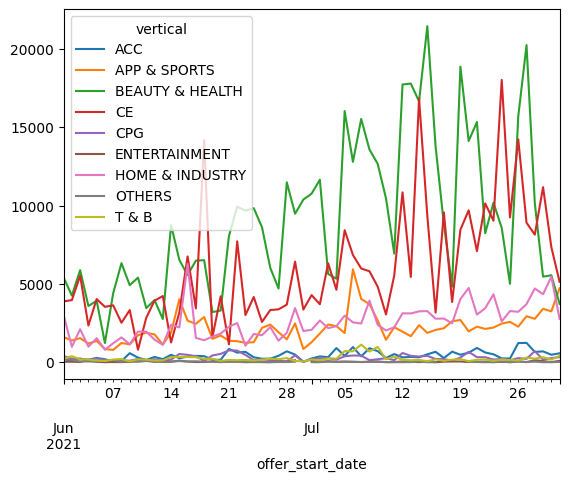

In [19]:
# How performed each vertical over the time?
# It seems there is a seasonality in beauty and health products
# The most profitable products had a better performance by the end of the serie
# (positive trend)
offers.pivot_table(index="offer_start_date",
                   columns="vertical",
                   values="sold_amount",
                   aggfunc="sum").plot()

<Axes: xlabel='offer_finish_date'>

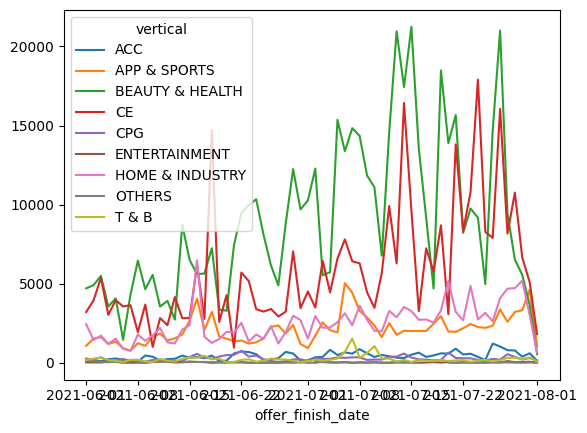

In [20]:
# Finish date has similar plot
offers.pivot_table(index="offer_finish_date",
                   columns="vertical",
                   values="sold_amount",
                   aggfunc="sum").plot()

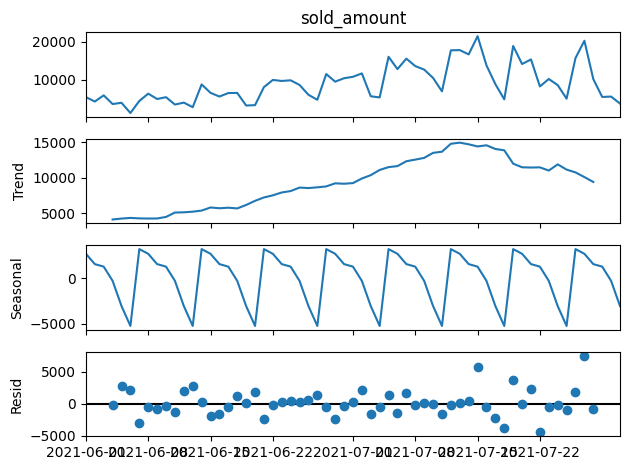

In [21]:
#It really has a seasonality
season_bh = seasonal_decompose(
    offers.query("vertical == 'BEAUTY & HEALTH'")
    .groupby("offer_start_date")
    .sold_amount.sum()
)
season_bh.plot()
plt.show()

In [22]:
# A week seasonality
# Starting on weekends are not so profitable. Maybe we should reconsider
# this time
season_bh.seasonal.head(8)

offer_start_date
2021-06-01    2645.181279
2021-06-02    1522.211993
2021-06-03    1246.378932
2021-06-04    -303.529614
2021-06-05   -3047.436221
2021-06-06   -5218.824792
2021-06-07    3156.018422
2021-06-08    2645.181279
Name: seasonal, dtype: float64

In [23]:
# Some specific domain?
# This dataset is from the COVID-19 pandemic. Masks were on trend.
# Maybe this dataset is no longer applicable
offers.query("vertical == 'BEAUTY & HEALTH'")\
    .groupby("domain_id").sold_amount.sum()\
    .sort_values(ascending=False)

domain_id
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    410363.30
MLM-DISPOSABLE_GLOVES                 55365.39
MLM-OXIMETERS                         17606.61
MLM-THERMOMETERS                       9504.12
MLM-OXYGEN_CONCENTRATORS               8936.75
                                       ...    
MLM-ORTHOPEDIC_WRIST_BRACES               0.00
MLM-ORTHOPEDIC_WALKER_BOOTS               0.00
MLM-SCULPTURED_NAIL_REMOVER_CLIPS         0.00
MLM-SPLINTS                               0.00
MLM-STYLING_CHAIRS                        0.00
Name: sold_amount, Length: 146, dtype: float64

In [24]:
# % of the domain id
offers.query("vertical == 'BEAUTY & HEALTH'")\
    .groupby("domain_id").sold_amount.sum()\
    .sort_values(ascending=False)\
    .pipe(lambda x: x/x.sum())

domain_id
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    0.749622
MLM-DISPOSABLE_GLOVES                0.101137
MLM-OXIMETERS                        0.032162
MLM-THERMOMETERS                     0.017361
MLM-OXYGEN_CONCENTRATORS             0.016325
                                       ...   
MLM-ORTHOPEDIC_WRIST_BRACES          0.000000
MLM-ORTHOPEDIC_WALKER_BOOTS          0.000000
MLM-SCULPTURED_NAIL_REMOVER_CLIPS    0.000000
MLM-SPLINTS                          0.000000
MLM-STYLING_CHAIRS                   0.000000
Name: sold_amount, Length: 146, dtype: float64

/tmp/ipykernel_2325438/2276934313.py:4: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({"sold_amount": sum,


<Axes: xlabel='offer_start_date'>

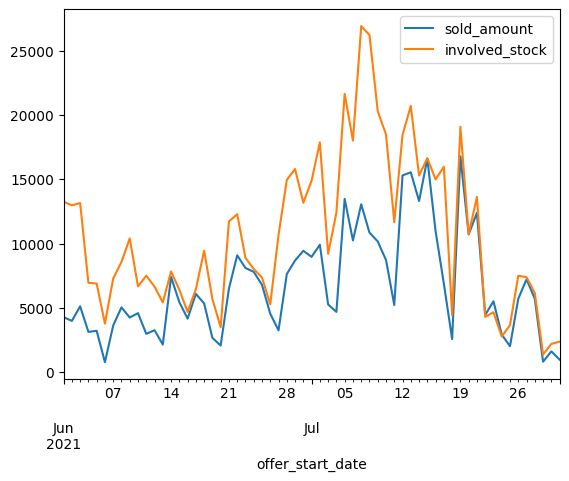

In [25]:
offers.query("vertical == 'BEAUTY & HEALTH' and \
              domain_id == 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS'")\
    .groupby("offer_start_date")\
    .agg({"sold_amount": sum,
          "involved_stock": sum}).plot()

<Axes: xlabel='offer_start_date'>

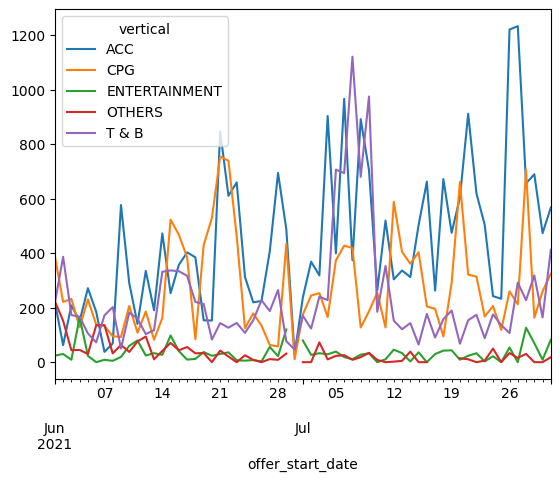

In [26]:
# What about the other series (lowest profitable)
offers\
    .pipe(lambda x: x[~x.vertical.isin(["BEAUTY & HEALTH",
                                        "CE",
                                        "APP & SPORTS",
                                        "HOME & INDUSTRY"])])\
    .pivot_table(index="offer_start_date",
                   columns="vertical",
                   values="sold_amount",
                   aggfunc="sum").plot()

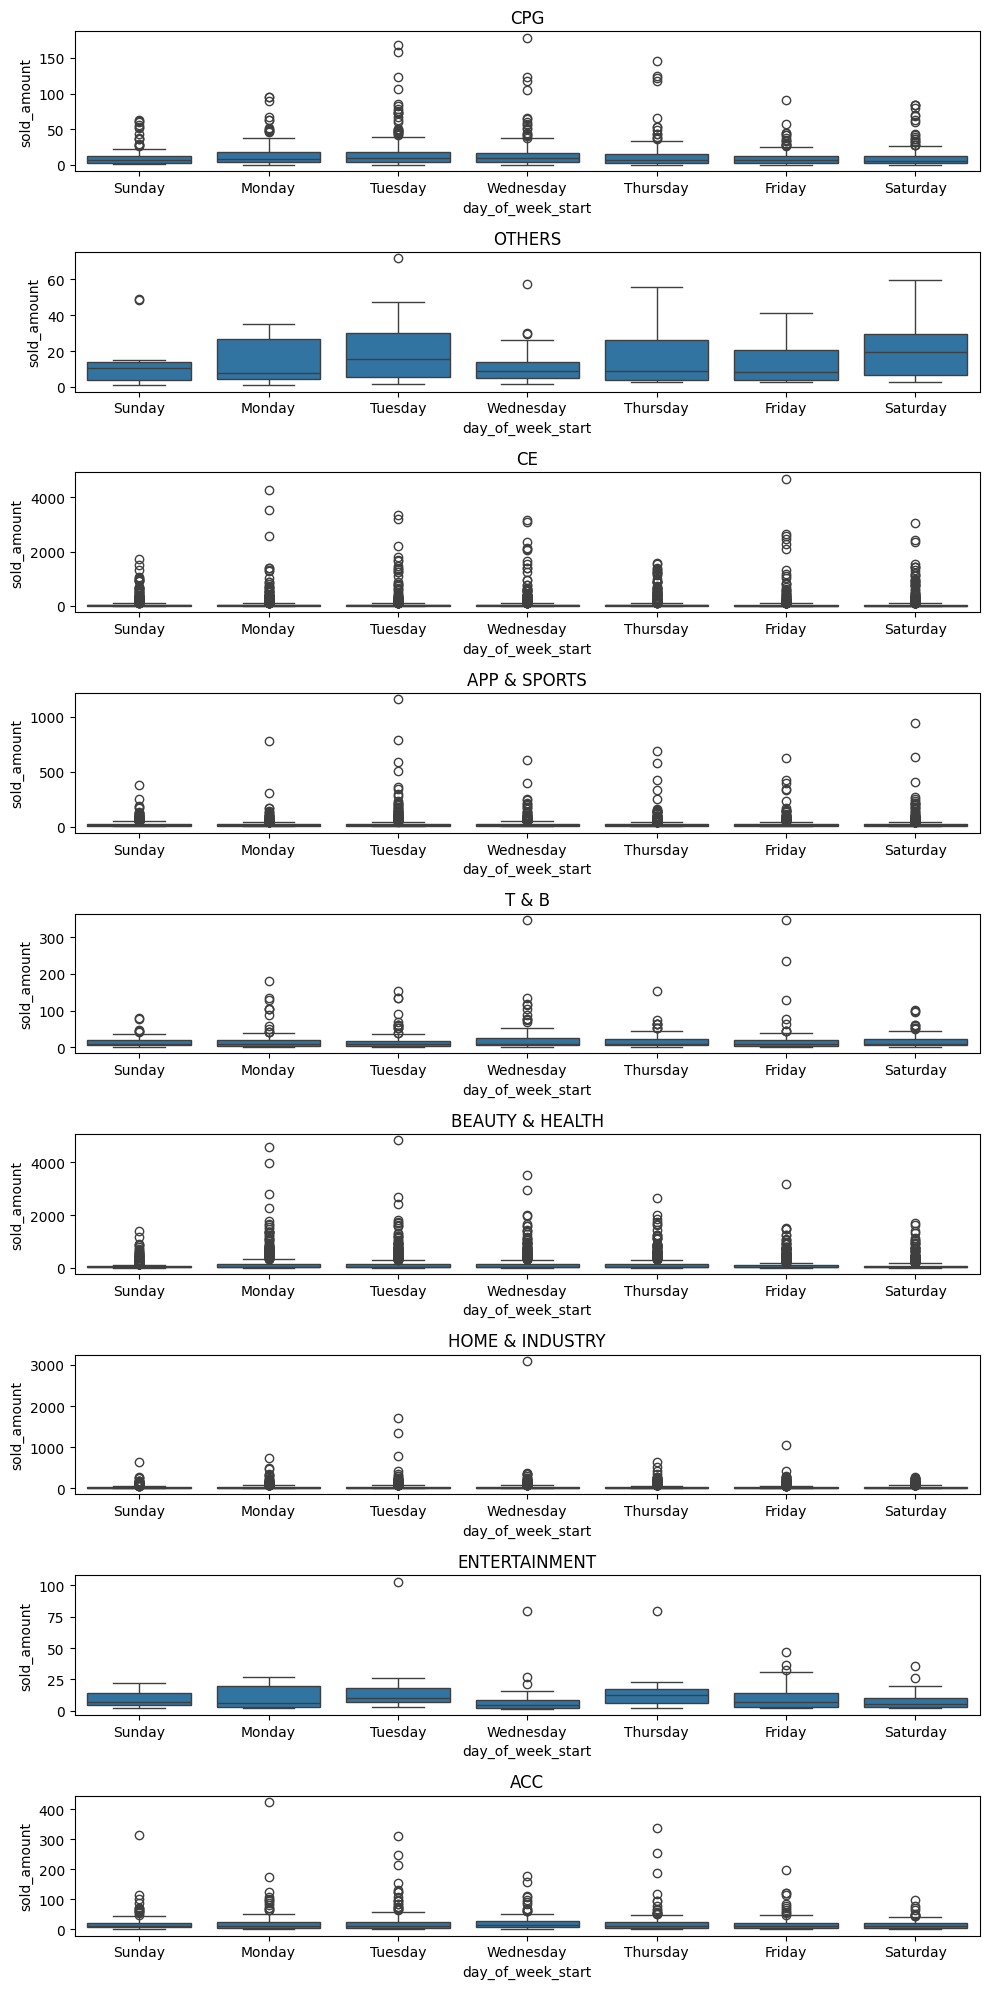

In [27]:
# Box plot of the day of the week sold amount
# It seems ENTERTAINMENT and OTHERS have worse performance in Saturday/Sunday,
# respectively, and Wednesday
# Let's take a closer look
_, axis = plt.subplots(nrows=offers.vertical.nunique(), ncols=1, figsize=(10, 20))
for ax, v in zip(axis, offers.vertical.unique()):
    data = offers.query(f"vertical == '{v}'")
    sns.boxplot(data=data,
                x="day_of_week_start",
                y="sold_amount",
                hue="vertical",
                ax=ax)
    ax.set_title(v)
    ax.legend().remove()
    #ax.set_ylim(-10, data.sold_amount.quantile(0.95))
plt.tight_layout()

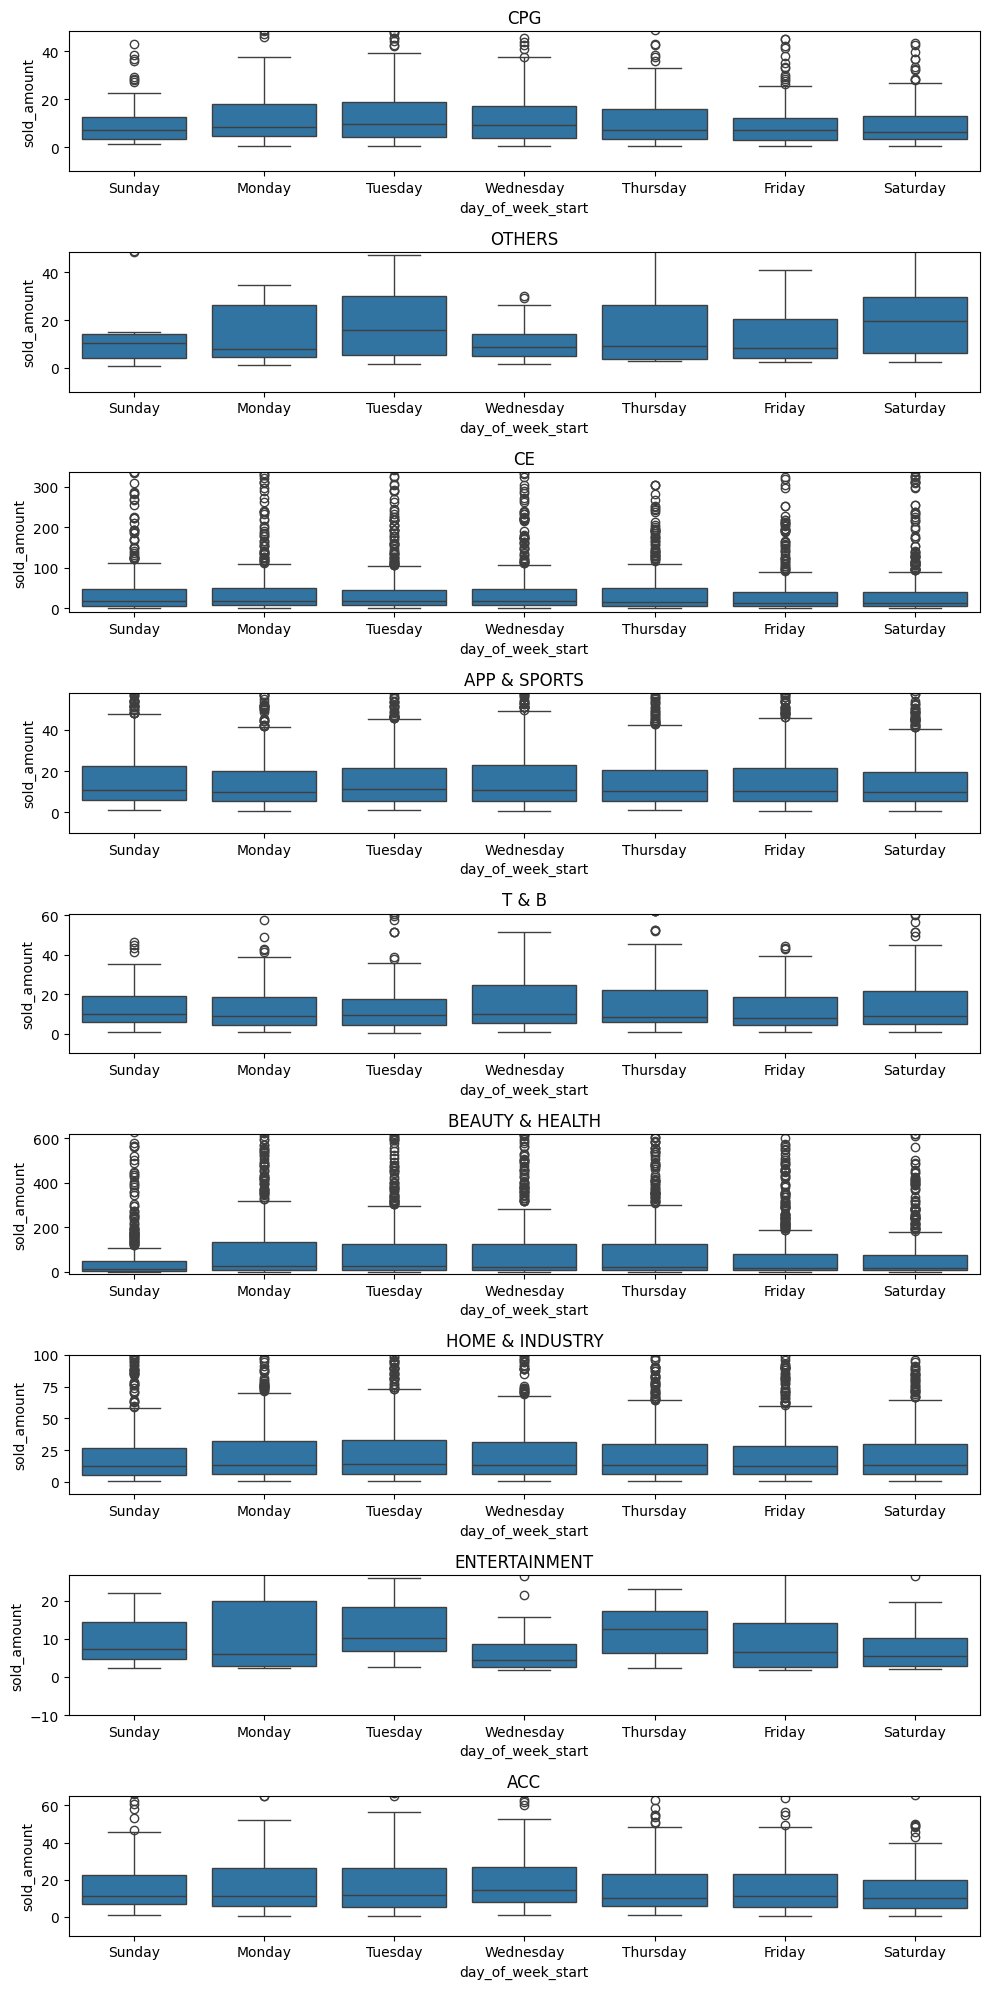

In [28]:
# Zoom in
_, axis = plt.subplots(nrows=offers.vertical.nunique(), ncols=1, figsize=(10, 20))
for ax, v in zip(axis, offers.vertical.unique()):
    data = offers.query(f"vertical == '{v}'")
    sns.boxplot(data=data,
                x="day_of_week_start",
                y="sold_amount",
                hue="vertical",
                ax=ax)
    ax.set_title(v)
    ax.legend().remove()
    ax.set_ylim(-10, data.sold_amount.quantile(0.95))
plt.tight_layout()

<Axes: xlabel='offer_start_date'>

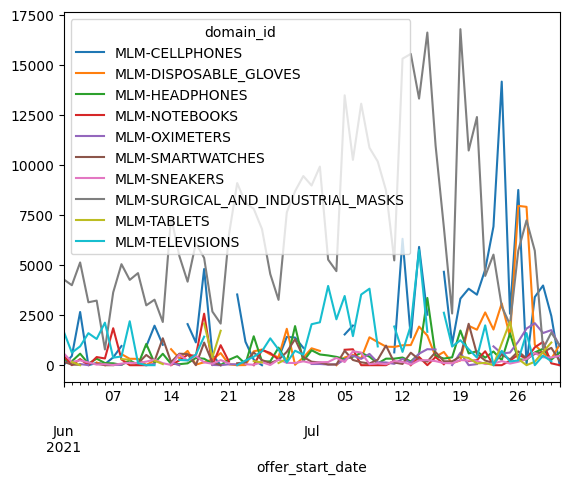

In [29]:
top10_domains = offers.groupby("domain_id").sold_amount.sum()\
    .sort_values(ascending=False).head(10)
offers[offers.domain_id.isin(top10_domains.index)]\
    .pivot_table(index="offer_start_date",
                 columns="domain_id",
                 values="sold_amount",
                 aggfunc="sum").plot()

## Other analysis

In [30]:
# Higher the stock, higher the sold quantity?
# Let's use the new sold amount, considering an error in sold_quantity column
offers = offers.assign(new_sold_quantity=lambda x:
                       x.involved_stock - x.remaining_stock_after_end)\
    .assign(perc_sold_stock=lambda x: x.new_sold_quantity/x.involved_stock)

<Axes: xlabel='involved_stock', ylabel='perc_sold_stock'>

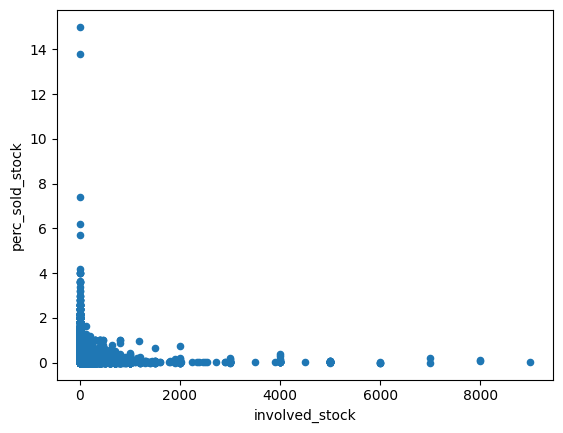

In [31]:
# My hypothesis: bigger the stock, bigger the perc sold amount
# But that is not true
# Besides, there are some cases where the stock is smaller than the sold amount
offers.plot(kind="scatter", y="perc_sold_stock", x="involved_stock")

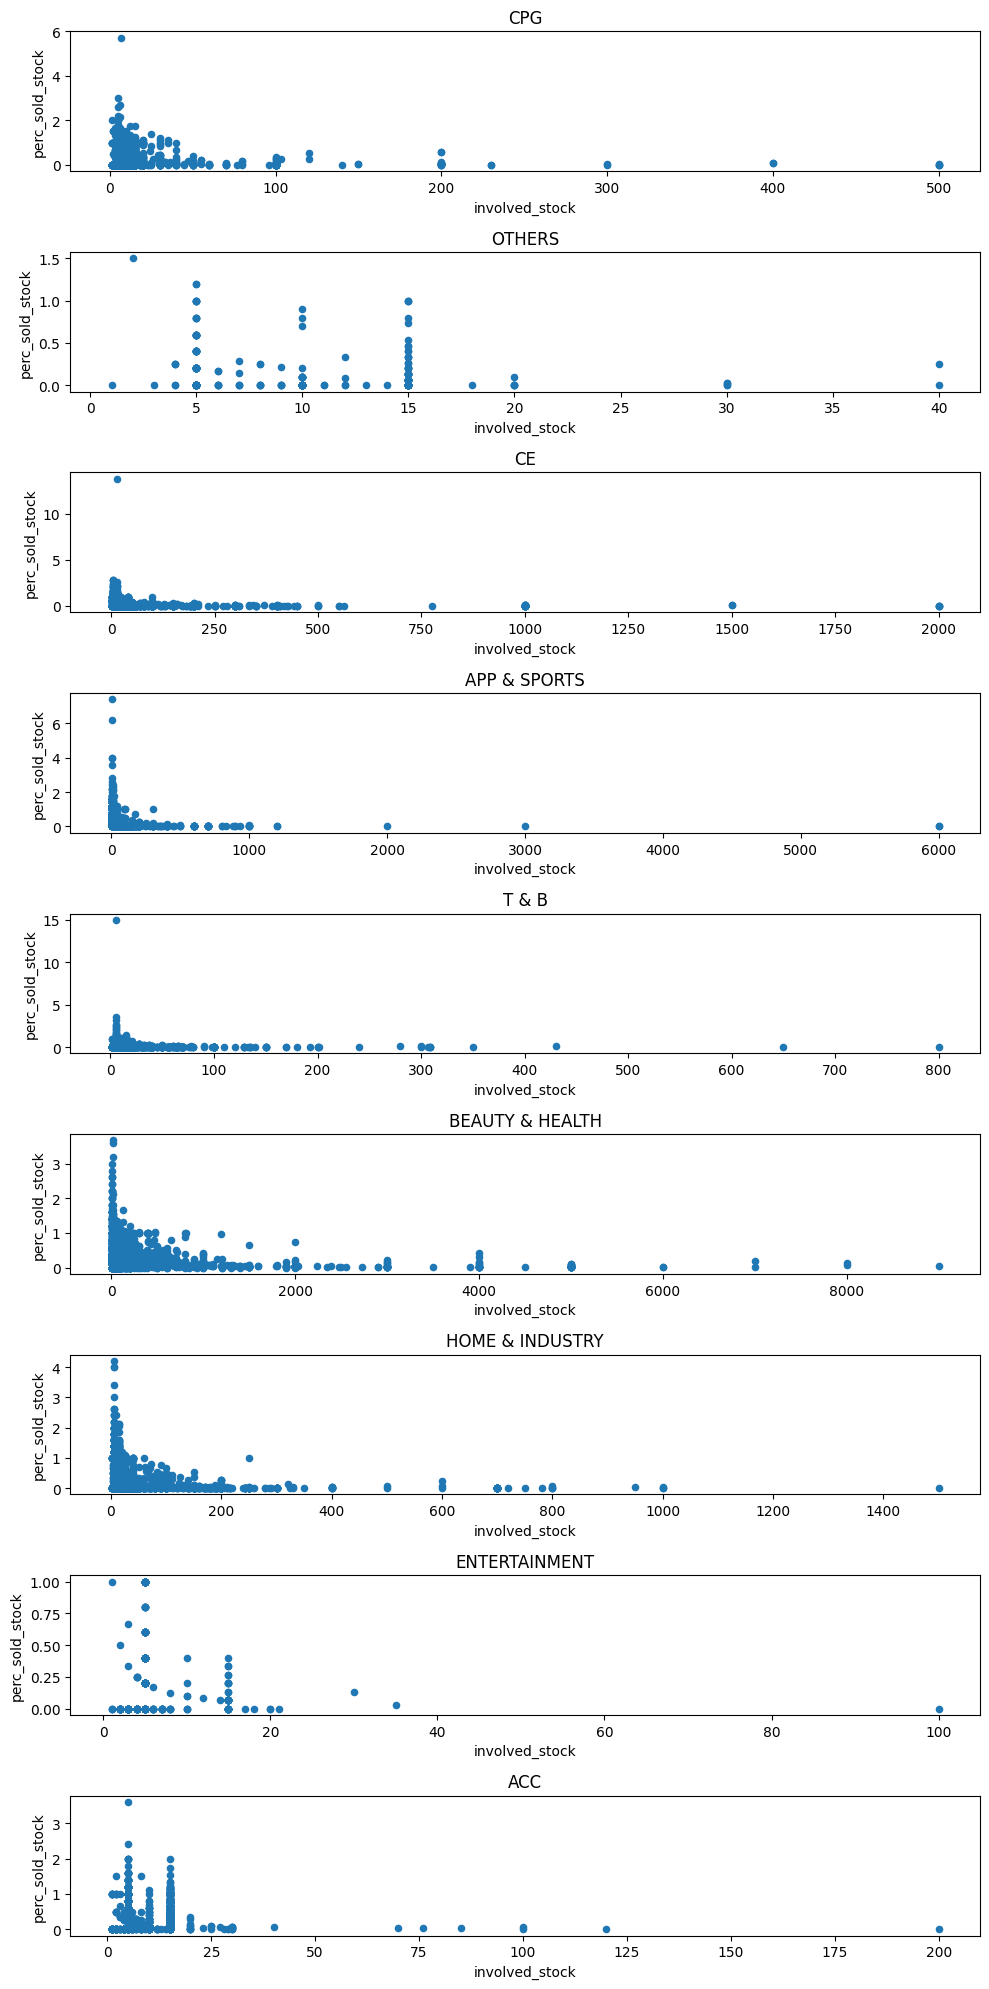

In [32]:
# Let's split this analysis per vertical, as the amount of each thing
# maybe are not comparable
_, axis = plt.subplots(nrows=offers.vertical.nunique(), ncols=1, figsize=(10, 20))
for ax, v in zip(axis, offers.vertical.unique()):
    data = offers.query(f"vertical == '{v}'")
    data.plot(kind="scatter", y="perc_sold_stock", x="involved_stock", ax=ax)
    ax.set_title(v)
plt.tight_layout()

In [33]:
# Which vertical is more profitable?
offers.groupby("vertical").sold_amount.sum()\
    .sort_values(ascending=False)

vertical
BEAUTY & HEALTH    547427.27
CE                 362787.94
HOME & INDUSTRY    155518.68
APP & SPORTS       131101.36
ACC                 26819.98
CPG                 16787.68
T & B               14302.78
ENTERTAINMENT        1988.57
OTHERS               1929.24
Name: sold_amount, dtype: float64

In [34]:
# Which of the domain is more profitable?
top10_domains

domain_id
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    410363.30
MLM-CELLPHONES                       111678.79
MLM-TELEVISIONS                       66366.08
MLM-DISPOSABLE_GLOVES                 55365.39
MLM-HEADPHONES                        29628.06
MLM-SMARTWATCHES                      21572.06
MLM-TABLETS                           19123.19
MLM-OXIMETERS                         17606.61
MLM-NOTEBOOKS                         17598.28
MLM-SNEAKERS                          12004.28
Name: sold_amount, dtype: float64

In [35]:
# Top 5 most sold for each vertical
# Others -> Pet
offers.groupby(["vertical","domain_id"]).sold_amount.sum()\
    .sort_values(ascending=False).reset_index()\
    .pipe(lambda x: pd.concat([x.query(f"vertical == '{v}'").head(5)
                     for v in x.vertical.unique()]))

,vertical,domain_id,sold_amount
0,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS,410363.30
3,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES,55365.39
7,BEAUTY & HEALTH,MLM-OXIMETERS,17606.61
12,BEAUTY & HEALTH,MLM-THERMOMETERS,9504.12
13,BEAUTY & HEALTH,MLM-OXYGEN_CONCENTRATORS,8936.75
1,CE,MLM-CELLPHONES,111678.79
2,CE,MLM-TELEVISIONS,66366.08
4,CE,MLM-HEADPHONES,29628.06
5,CE,MLM-SMARTWATCHES,21572.06
6,CE,MLM-TABLETS,19123.19


In [36]:
# And the lower ones?
offers.groupby("domain_id").sold_amount.sum()\
    .sort_values(ascending=False).tail(10)

domain_id
MLM-ROBOT_VACUUMS                      0.0
MLM-ROBES                              0.0
MLM-REPTILE_AND_AMPHIBIAN_FOODS        0.0
MLM-REPLACEMENT_COFFEE_CARAFES         0.0
MLM-C_CLAMPS                           0.0
MLM-LICE_COMBS                         0.0
MLM-LED_STAGE_LIGHTS                   0.0
MLM-LEARNING_MAZES                     0.0
MLM-LATEX_ENAMEL_AND_ACRYLIC_PAINTS    0.0
MLM-RATTLES                            0.0
Name: sold_amount, dtype: float64

In [37]:
offers.assign(duration_bin=lambda x:
              pd.cut(x.duration,
                     bins=np.arange(-1,
                                    int(offers.duration.max()) + 4, step=3)))\
    .duration_bin.value_counts()

duration_bin
(5, 8]        38105
(-1, 2]        4590
(8, 11]        3251
(2, 5]         2620
(11, 14]        175
(14, 17]          4
(104, 107]        1
(17, 20]          0
(23, 26]          0
(26, 29]          0
(29, 32]          0
(20, 23]          0
(35, 38]          0
(38, 41]          0
(41, 44]          0
(44, 47]          0
(47, 50]          0
(50, 53]          0
(53, 56]          0
(32, 35]          0
(56, 59]          0
(59, 62]          0
(65, 68]          0
(62, 65]          0
(71, 74]          0
(74, 77]          0
(77, 80]          0
(68, 71]          0
(80, 83]          0
(83, 86]          0
(89, 92]          0
(86, 89]          0
(92, 95]          0
(95, 98]          0
(98, 101]         0
(101, 104]        0
Name: count, dtype: int64

<Axes: xlabel='duration_bin', ylabel='sold_amount'>

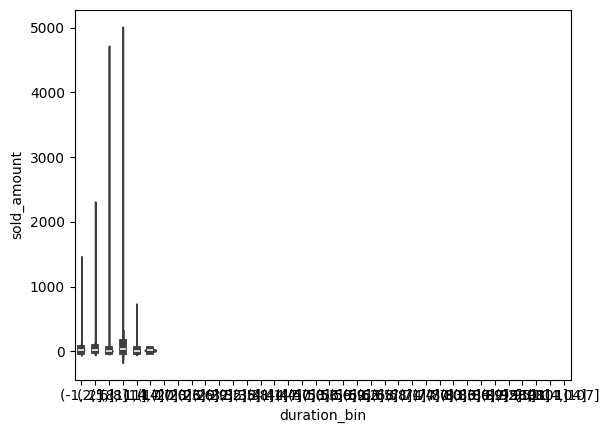

In [38]:
# There is a duration (104, 107] hours (outlier)
sns.violinplot(data=offers.assign(duration_bin=lambda x:
              pd.cut(x.duration,
                     bins=np.arange(-1,
                                    int(x.duration.max()) + 4, step=3))),
            x="duration_bin",
            y="sold_amount")

<Axes: xlabel='duration_bin', ylabel='sold_amount'>

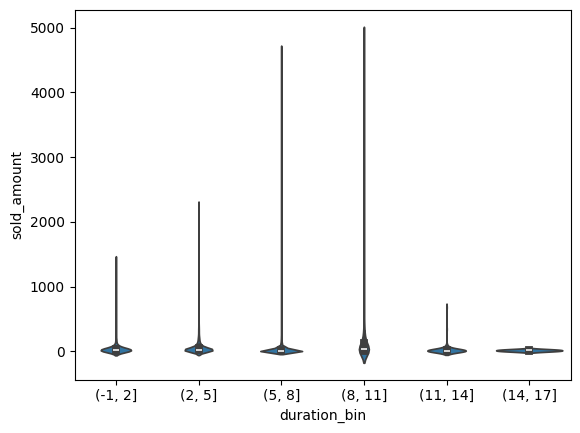

In [39]:
# Sold amount per duration time
# More the duration, it means no more sold amout
sns.violinplot(data=offers.query("duration < 100").assign(duration_bin=lambda x:
              pd.cut(x.duration,
                     bins=np.arange(-1,
                                    int(x.duration.max()) + 4, step=3))),
            x="duration_bin",
            y="sold_amount")

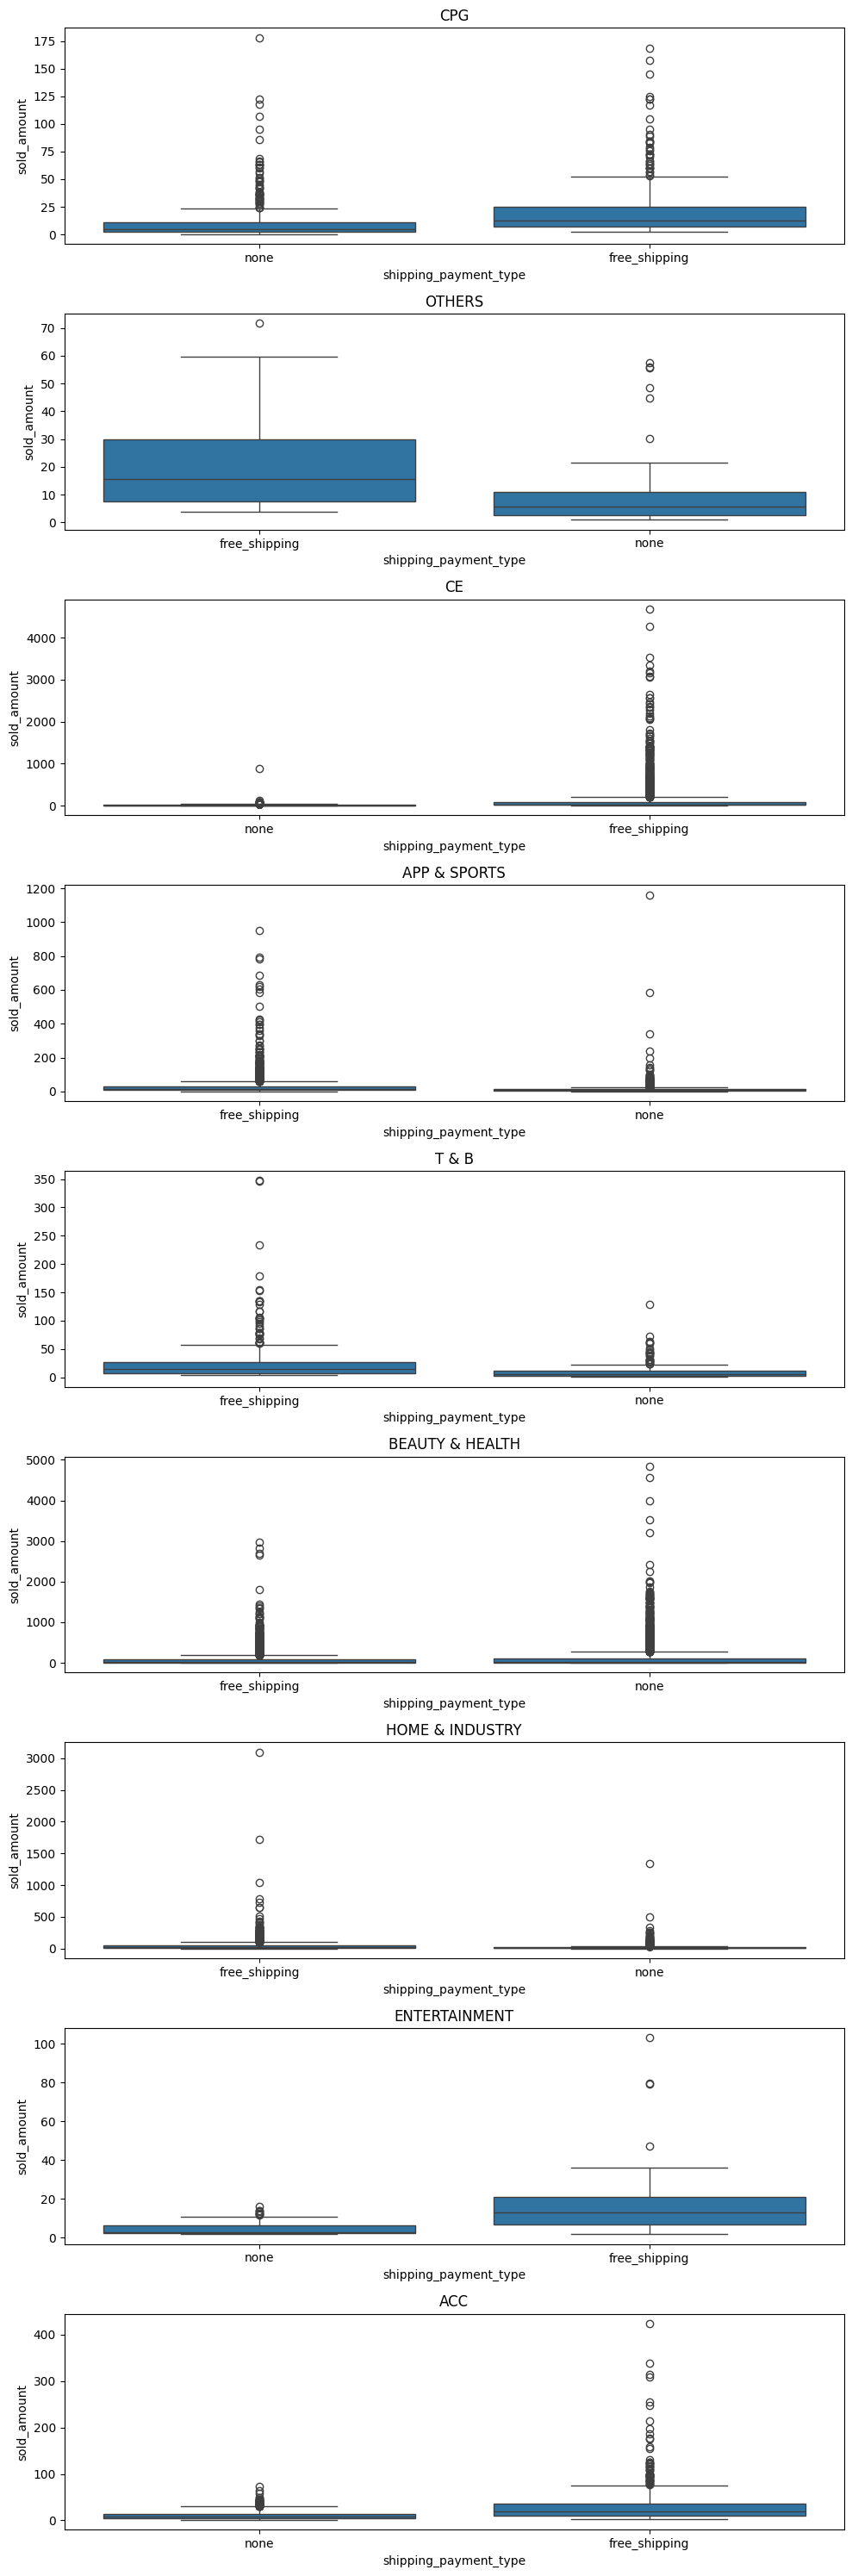

In [40]:
# Sold amount vs shipping
# Hypothesis: there is some connection between free shipping and some
# verticals, like other, entertainment
_, axis = plt.subplots(nrows=offers.vertical.nunique(), ncols=1, figsize=(10, 30))
for ax, v in zip(axis, offers.vertical.unique()):
    data = offers.query(f"vertical == '{v}'")
    sns.boxplot(data=data,
                x="shipping_payment_type",
                y="sold_amount",
                hue="vertical",
                ax=ax)
    ax.set_title(v)
    ax.legend().remove()
    #ax.set_ylim(-10, data.sold_amount.quantile(0.95))
plt.tight_layout()

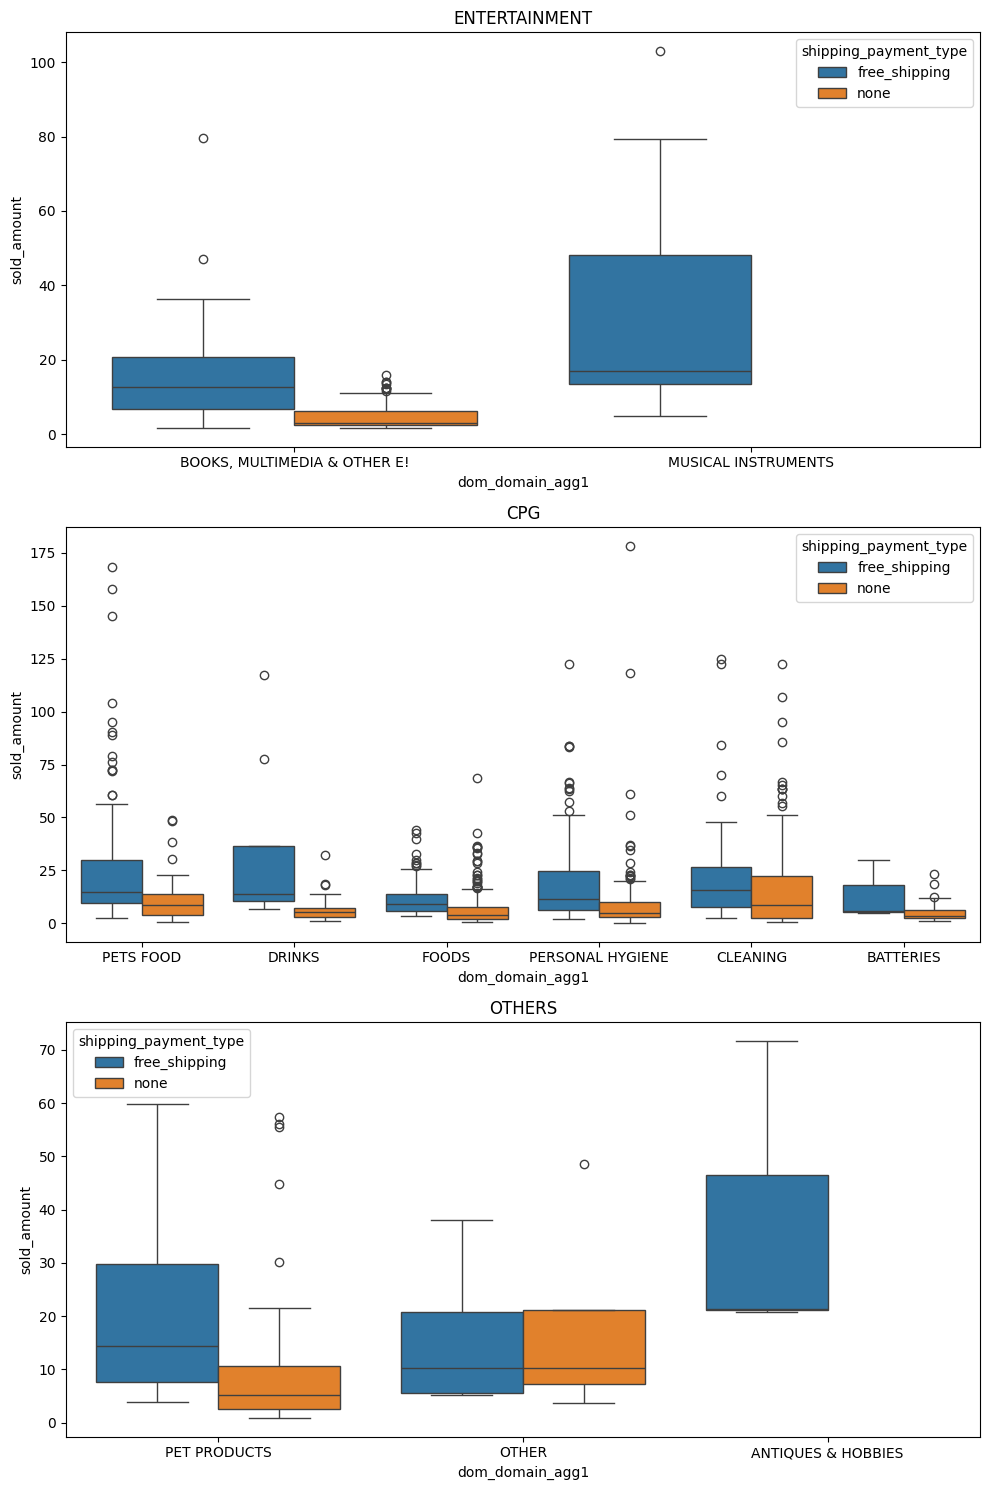

In [41]:
# Let's check out the bigger differences
vertical_analysis = ["ENTERTAINMENT", "CPG", "OTHERS"]
_, axis = plt.subplots(nrows=len(vertical_analysis), ncols=1, figsize=(10, 15))
for ax, v in zip(axis, vertical_analysis):
    data = offers.query(f"vertical == '{v}'")
    sns.boxplot(data=data
                .assign(shipping_payment_type=lambda x:
                        pd.Categorical(x.shipping_payment_type,
                                       categories=["free_shipping", "none"])),
                x="dom_domain_agg1",
                hue="shipping_payment_type",
                y="sold_amount",
                ax=ax)
    ax.set_title(v)
plt.tight_layout()

# Next steps
As next steps and actions to be taken in this exploratory analysis, we could mention:

- A better understanding of how the final stock balance can become negative (what does this mean?)
- Adjusting the mask campaigns during weekdays (is there an opportunity based on this insight?)
- Deepening the analysis of products under the "others" category
- Is there any interaction between products? Are products launched together during the same period more engaging compared to individual launches?
- Do we have an opportunity with selling products with free shipping, such as books, pet food, etc.?